In [1]:
import tensorflow as tf
from get_data import get_cifar_10
cifar_10 = get_cifar_10("data/cifar_10/")

Unpickling and reshaping data
Finished unpickling and reshaping data


In [2]:
def weight_variable(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

def bias_variable(shape):
    return tf.Variable(tf.zeros(shape))

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [3]:
x = tf.placeholder(tf.float32, [None, 32, 32, 3])
keep_prob = tf.placeholder(tf.float32)

W_1 = weight_variable([3, 3, 3, 32])
b_1 = bias_variable([32])
conv_1 = tf.nn.relu(conv2d(x, W_1) + b_1)
max_pool_1 = max_pool(conv_1)

W_2 = weight_variable([3, 3, 32, 64])
b_2 = bias_variable([64])
conv_2 = tf.nn.relu(conv2d(max_pool_1, W_2) + b_2)
max_pool_2 = max_pool(conv_2)

max_pool_2_flat = tf.reshape(max_pool_2, [-1, 8 * 8 * 64])

W_3 = weight_variable([4096, 256])
b_3 = bias_variable([256])
fc_3 = tf.nn.relu(tf.matmul(max_pool_2_flat, W_3) + b_3)
dropout_3 = tf.nn.dropout(fc_3, keep_prob)

W_4 = weight_variable([256, 10])
b_4 = bias_variable([10])
y = tf.matmul(dropout_3, W_4) + b_4

In [4]:
sess = tf.Session()

In [5]:
y_true = tf.placeholder(tf.float32, [None, 10])

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_true))

step = tf.train.AdamOptimizer(3e-4).minimize(loss)

In [6]:
sess.run(tf.global_variables_initializer())

losses = []

for i in range(50001):
    x_batch, y_batch = cifar_10.train.next_batch(64)
    _, current_loss = sess.run([step, loss], {x: x_batch, y_true: y_batch, keep_prob: 0.25})
    losses.append(current_loss)
    if i % 2500 == 0:
        print "loss at step {}: {}".format(i, current_loss)

loss at step 0: 4.91690158844
loss at step 2500: 1.50666308403
loss at step 5000: 0.997215986252
loss at step 7500: 1.00711774826
loss at step 10000: 0.746093571186
loss at step 12500: 0.800453603268
loss at step 15000: 0.697814166546
loss at step 17500: 0.92718142271
loss at step 20000: 0.850577414036
loss at step 22500: 0.88633441925
loss at step 25000: 0.481972515583
loss at step 27500: 0.817610621452
loss at step 30000: 0.484441518784
loss at step 32500: 0.468379169703
loss at step 35000: 0.553074240685
loss at step 37500: 0.312386900187
loss at step 40000: 0.344637930393
loss at step 42500: 0.35525098443
loss at step 45000: 0.272615402937
loss at step 47500: 0.266407608986
loss at step 50000: 0.660125255585


In [9]:
percent_correct = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1)), tf.float32))
print sess.run(percent_correct, feed_dict={x: cifar_10.test.data, y_true: cifar_10.test.labels, keep_prob: 1})
print sess.run(percent_correct, feed_dict={x: cifar_10.train.data[:10000], y_true: cifar_10.train.labels[:10000], keep_prob: 1})

0.74
0.9708


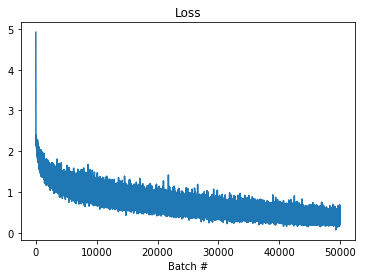

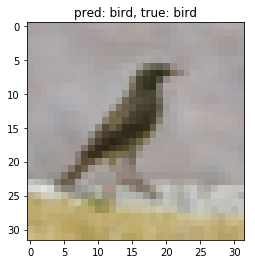

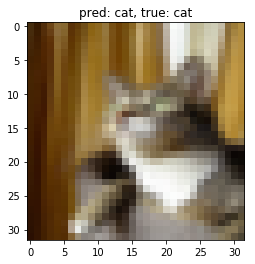

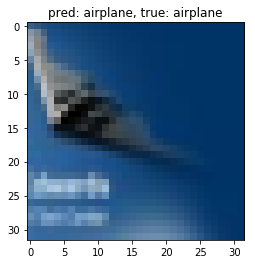

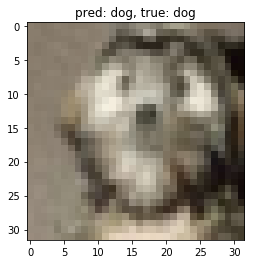

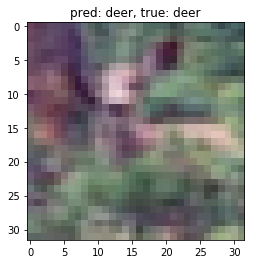

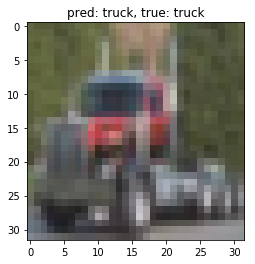

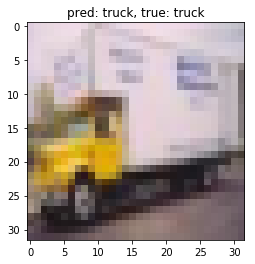

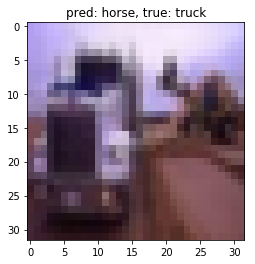

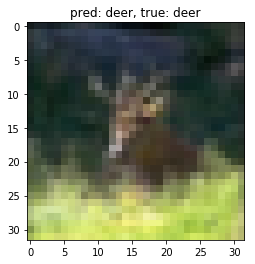

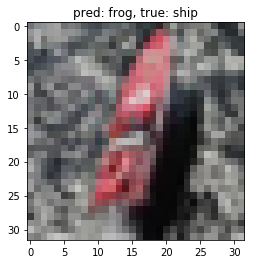

In [10]:
import visualizations
import numpy.random as nprand

visualizations.plot_learning_curve(losses)

indices = nprand.randint(10000, size=10)

sample_data = cifar_10.test.data[indices]
sample_labels = cifar_10.test.labels[indices]
y_pred = sess.run(y, feed_dict={x: sample_data, y_true: sample_labels, keep_prob:1})

visualizations.visualize_cifar_10(sample_data, y_pred, sample_labels)